In [114]:
!pip install h5py
from utilities import *

In [115]:
X, y, Xtest, yt = load_data() # chargement des training data et des test data

In [116]:
print(X.shape,y.shape) # On a 1000 photos de 64*64 pixels

(1000, 64, 64) (1000, 1)


In [117]:
print(np.unique(y,return_counts=True)) # 500 photos de chats, 500 photos de chien

(array([0., 1.]), array([500, 500]))


In [118]:
print(Xtest.shape,yt.shape) # plus 200 photos de test

(200, 64, 64) (200, 1)


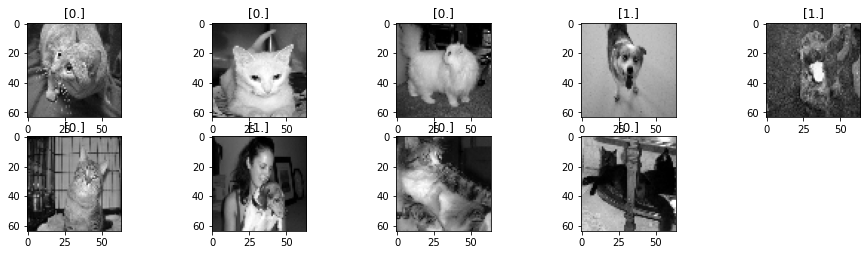

In [119]:
# Affichons quelques photos
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(X[i],cmap='gray')
    plt.title(y[i])
    #plt.tight_layout()
plt.show()

In [120]:
# Une fois aplatie, chaque photo est un vecteur de 4096 pixels, 
# donc 4096 variables qui prennent des valeurs entre 0 et 255 (1 pixel = 8 bits)

In [121]:
# On commence donc par applatir nos images pour en faire un vecteur de 1000 lignes et 4096 caractéristiques
Xr=X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [122]:
Xr.shape # zou!

(1000, 4096)

In [123]:
Xt=Xtest.reshape(Xtest.shape[0],Xtest.shape[1]*Xtest.shape[2])

In [124]:
y.shape

(1000, 1)

In [125]:
# Il n'y a plus qu'à entraîner notre modèle avec ces données

In [126]:
from random import randint


# On initialise les paramètres du perceptron
def initParam(n):
    
    # W=np.random.randn(n,1)
    W = np.array ([a % 2 - 0.5 for a in range (n)])
    
    # b=np.random.randn(1)
    b = 0.5
    
    return (W,b)


In [127]:
W,b = initParam(Xr.shape[1])
print(W.shape,b)
print (W)

(4096,) 0.5
[-0.5  0.5 -0.5 ...  0.5 -0.5  0.5]


In [128]:
from math import exp

"""
Nous nous sommes aperçus que les résultats du perceptron
donnaient toujours des "0", car le modèle n'était pas normalisé.
"""

def normalisation (X):
    
    images = [
        [
            element / 256
            for element in ligne
        ]
        for ligne in X
    ]
    
    return images


# On définit notre modèle
def perceptron (X, W, b):

    # Produit matriciel
    P = [
        np.dot (W, ligne)
        for ligne in X
    ]

    # Ajout du biais
    Z = [
        nb + b
        for nb in P
    ]
    
    # Application de la sigmoïde
    resultat = [
        1 / (1 + exp (-element))
        for element in Z
    ]

    return resultat


donnees = normalisation (Xr[: 20])
A = perceptron (donnees, W, b)
print (A)

[0.07963873882758325, 0.5472221223879256, 0.9903102833254365, 0.16505408392910764, 0.8764229964761774, 0.09122006170987908, 0.9999992761434494, 0.19102566908851437, 0.09518112544911916, 0.01495708659314999, 0.79881528176072, 0.004627530047867153, 0.4134771498315425, 0.9760379759604947, 0.035344078057552845, 0.862930226964697, 0.6540113533952943, 0.2837813906831087, 0.9700134939339985, 0.5102524689953922]


In [129]:
def prodScal (U, V):
    
    return sum (U * V)


In [133]:
# On évalue la performance du modèle
n = 1000
m = 4096


def norme (vecteur):
    
    # Norme 2
    return (vecteur[0] ** 2 + vecteur[1] ** 2) ** 0.5


def cout (A, y):

    loss = sum (norme (A - y) ** 2) / (2 * m)
    return loss


print (cout (y, A))

0.0017952020501181996


In [136]:
# Dérivée de "L"
def derivee (y, a, xj):

    liste = [
        (y[i] - a[i]) * a[i] * (1 - a[i]) * xj[i]
        for i in range (20)
    ]
    return sum (liste) / len (liste)


# On effectue un pas de gradient
def gradient (A, X, y, j):

    d = derivee (y, A, X[j])

    if d > 0:
        j -= 20
    else:
        j += 20
    
    return j


j = 0
print (gradient (A, donnees, y, j))

-20


In [156]:
# On définit notre fonction d'apprentissage
def unTour (X, y, W, b, alpha = 0.1, iter = 100):
    
    lots = normalisation (np.reshape (X, (4096, 50, 20)))
    for xTrain in lots:
        A = perceptron (xTrain, W[: 20], b)
        W = gradient (A, xTrain, y, j)
    
    plt.plot (cout)  # On trace la courbe de descente des couts 
    plt.show ()
    return (W, b)

In [157]:
j = 0
W, b = initParam (n)
W, b = unTour (Xr, y, W, b)

TypeError: 'int' object is not subscriptable

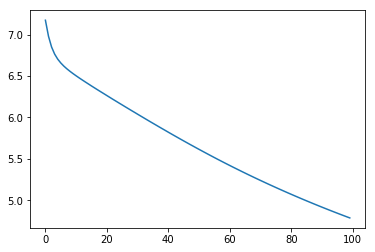

In [ ]:
W,b = unTour(Xn,y,alpha=0.01)

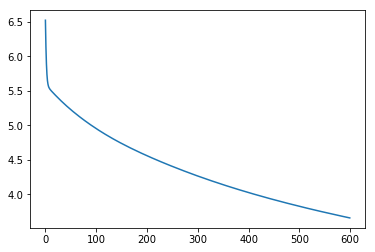

In [ ]:
# Voila qui est mieux
W,b = unTour(Xn,y,alpha=0.01,iter=600)

In [ ]:
# Nous y voilà!
# Quelle est alors la performance du modèle?
from sklearn.metrics import accuracy_score

In [ ]:
def predict(X,W,b):
     # à compléter

In [ ]:
# On modifie la fonction d'apprentissage pour afficher les courbes de coûts 
# et les performances du modèle
def learnRN(X,y,alpha=0.1, iter=100): 
    
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot (Loss)  # On trace la courbe de descente des couts 
    plt.subplot(1,2,2)
    plt.plot(Acc) # et l'accuracy 
    plt.show()
    return W,b

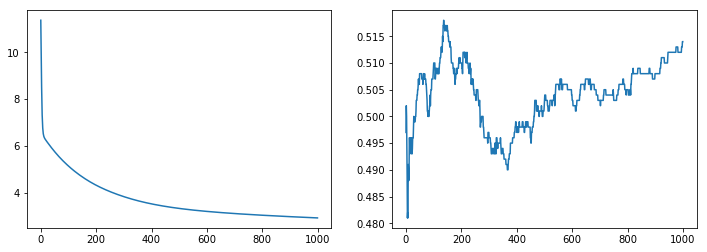

In [ ]:
W,b = learnRN(Xn,y,alpha=0.01,iter=1000)

On serait tenté d'aller plus loin car l'accuracy continue d'augmenter...

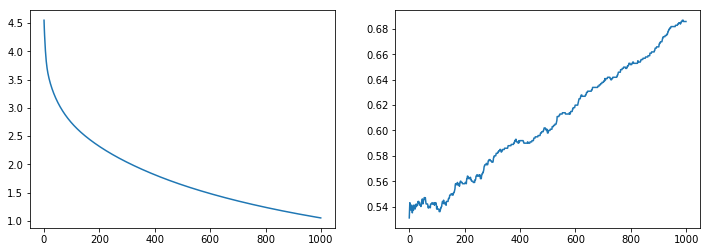

In [ ]:
W,b = learnRN(Xn,y,alpha=0.01,iter=10000)

In [ ]:
# Ne serait-on pas en overfitting? Il est temps de regarder ce qui se passe sur les datas de test

In [ ]:
def learnRN(X,y,Xt,yt,alpha=0.1, iter=100): # on ajouteles données de test
    
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot (Loss,label='Données d''entraînement')  # On trace la courbe de descente des couts 
    plt.plot (LossT,label='Données de test')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(Acc,label='Données d''entraînement')
    plt.plot(AccT,label='Données de test')
    plt.legend()
    plt.show()
    return W,b

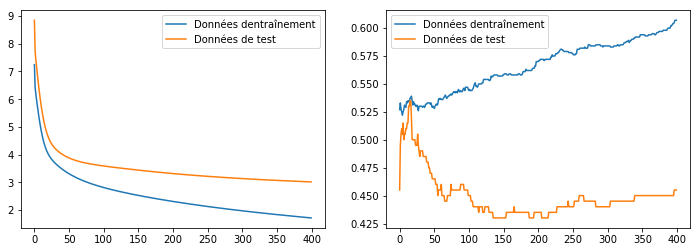

In [ ]:
W,b = learnRN(Xn,y,Xtn,yt,alpha=0.01,iter=4000)

In [ ]:
# On n'a pas assez de données pour le nombre de caractéristiques (Fléau de la dimension)
# Il faut réduire le nombre de variables ou augmenter le nombre de données
# Mais surtout... Augmenter le nombre de neurones! pour obtenir un réseau de neurones multicouche.

## A l'aide d'un PMC

In [ ]:
Xa, Ya, Xt, Yt = load_data() # chargement des training data et des test data

In [ ]:
# On applatit et on normalise les données
Xa=Xa.reshape(Xa.shape[0],Xa.shape[1]*Xa.shape[2])
Xt=Xt.reshape(Xt.shape[0],Xt.shape[1]*Xt.shape[2])

In [ ]:
print(Xa.shape,Ya.shape,Xt.shape,Yt.shape) 

(1000, 4096) (1000, 1) (200, 4096) (200, 1)


In [ ]:
Xa=Xa/255
Xt=Xt/255

In [ ]:
from sklearn.neural_network import MLPClassifier
# On commence avec les paramètres par défaut
clf = MLPClassifier(max_iter=1000, random_state=0)
# apprentissage avec les deux dernières variables
clf.fit(Xa, Ya)

D:\Users\tmontaut\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [ ]:
# On calcule les scores d'apprentissage et de tes
train_score = clf.score(Xa, Ya)
print("Le score sur les données d'apprentissage est {}".format(train_score))
test_score = clf.score(Xt, Yt)
print("Le score sur les données de test est {}".format(test_score))

Le score sur les données d'apprentissage est 0.589
Le score sur les données de test est 0.555


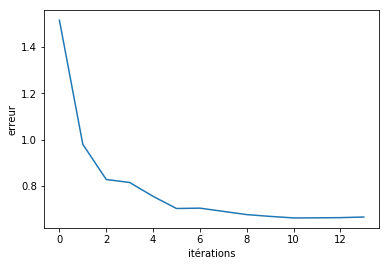

In [ ]:
plt.figure()
plt.xlabel('itérations')
plt.ylabel('erreur')
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
# 1 chance sur 2, Vraiment pas terrible! Et ce n'est pas un problème de nombre d'itérations
# Regardons comment cela varie avec le nombre de neurones dans une couche intermédiaire


D:\Users\tmontaut\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


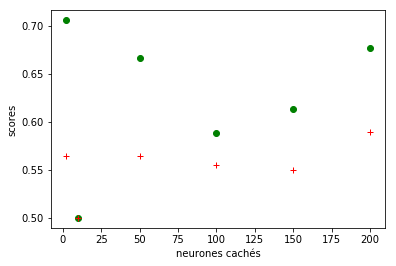

D:\Users\tmontaut\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


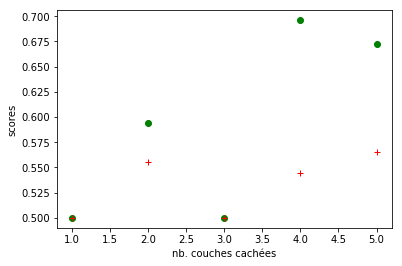

In [ ]:
# Et avec le nombre de couches (10 neurones dans chaque couche)


In [ ]:
# On a du mal à dépasser 60% sur les données de test, c'est notre challenge



D:\Users\tmontaut\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Le score sur les données d'apprentissage est 0.796
Le score sur les données de test est 0.61


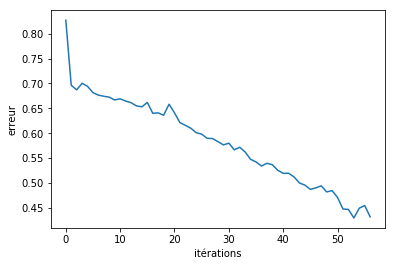

In [ ]:
# C'est pas trop mal!
plt.figure()
plt.xlabel('itérations')
plt.ylabel('erreur')
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
# Essayons avec une activation sigmoide


D:\Users\tmontaut\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Le score sur les données d'apprentissage est 0.5
Le score sur les données de test est 0.5


In [ ]:
# Difficile d'avoir mieux que 60% Il faudrait augmenter le nombre d'itérations mais c'est long...
# A moins de commencer par réduire le nombres de variables... A suivre

D:\Users\tmontaut\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


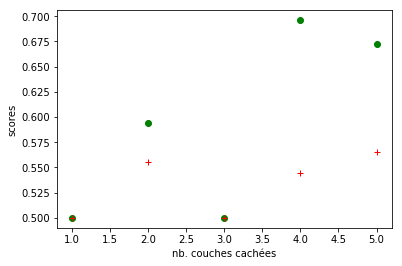

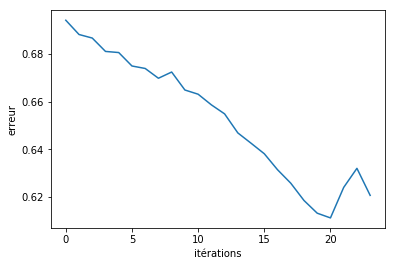

In [ ]:
plt.figure()
plt.xlabel('itérations')
plt.ylabel('erreur')
plt.plot(clf.loss_curve_)
plt.show()